# Data Preprocessing + Simple Pandas

The following will be an example of some good practices in data preprocessing using netflix show/movie data.

Here is the URL to the data: https://www.kaggle.com/shivamb/netflix-shows

## Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import os
os.getcwd()

'/Users/anandshankerpandey/Downloads'

In [ ]:
df = pd.read_csv("/Users/anandshankerpandey/Downloads/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.loc[df.release_year == 2021, ['type']].count()

type    592
dtype: int64

In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
columns = ['type','country','release_year']
for column in columns:
    print(df[column].unique())

['Movie' 'TV Show']
['United States' 'South Africa' nan 'India'
 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'
 'United Kingdom' 'Germany, Czech Republic' 'Mexico' 'Turkey' 'Australia'
 'United States, India, France' 'Finland' 'China, Canada, United States'
 'South Africa, United States, Japan' 'Nigeria' 'Japan'
 'Spain, United States' 'France' 'Belgium' 'United Kingdom, United States'
 'United States, United Kingdom' 'France, United States' 'South Korea'
 'Spain' 'United States, Singapore' 'United Kingdom, Australia, France'
 'United Kingdom, Australia, France, United States'
 'United States, Canada' 'Germany, United States'
 'South Africa, United States' 'United States, Mexico'
 'United States, Italy, France, Japan'
 'United States, Italy, Romania, United Kingdom'
 'Australia, United States' 'Argentina, Venezuela'
 'United States, United Kingdom, Canada' 'China, Hong Kong' 'Russia'
 'Canada' 'Hong Kong' 'United States, China, Hong Kong'
 'Italy, United State

In [ ]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [ ]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [ ]:
df.groupby('type')['show_id'].count()

type
Movie      6131
TV Show    2676
Name: show_id, dtype: int64

In [ ]:
df.groupby('type')['title'].count()

type
Movie      6131
TV Show    2676
Name: title, dtype: int64

In [ ]:
df.shape

(8807, 12)

## Preprocessing

- Find and fill in any missing values
- Check for duplicates
- Categorize data
- Type the data appropriately


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df['director'].isna().sum()

2634

In [ ]:
#Check for NAs
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df.isna().sum()/df.shape[0] * 100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [ ]:
df["country"].value_counts().sort_values(ascending=False)

United States                                           2818
India                                                    972
United Kingdom                                           419
Japan                                                    245
South Korea                                              199
                                                        ... 
Ireland, United Kingdom, Greece, France, Netherlands       1
France, Canada, Italy, United States, China                1
United States, Venezuela                                   1
United Kingdom, Canada, Japan                              1
United Arab Emirates, Jordan                               1
Name: country, Length: 748, dtype: int64

In [ ]:
df["rating"].value_counts().sort_values(ascending=False)

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [ ]:
df[["cast","director", "country", "rating"]] = df[["cast", "director", "country", "rating"]].fillna("Unknown")

In [ ]:
df.fillna('unknown')

In [ ]:
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

In [ ]:
# I could choose to get rid of rows to get rid of missing data
df = df.loc[df["date_added"].isna() == False, :]
# df.dropna(axis=0, subset=['date_added'], inplace=True)

In [ ]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df["date_added"] = pd.to_datetime(df["date_added"])
df["release_year"] = pd.to_datetime(df["release_year"], format="%Y")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      8797 non-null   object        
 4   cast          8797 non-null   object        
 5   country       8797 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8797 non-null   int64         
 8   rating        8797 non-null   object        
 9   duration      8794 non-null   object        
 10  listed_in     8797 non-null   object        
 11  description   8797 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 893.4+ KB


In [ ]:
#Check for duplicatess
duplicate = df[df.duplicated()]
duplicate

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

In [ ]:
#Create groups
movies = df.loc[df["type"] == "Movie", :]
tv_shows = df.loc[df["type"] == "TV Show", :]

#Get groups on genre
dramas = df[df["listed_in"].str.contains("Dramas")]

In [ ]:
dramas

In [ ]:
df.info()

In [ ]:
movies["duration"]

In [ ]:
tv_shows["duration"]

In [ ]:
movies.dropna(inplace=True)

In [ ]:
movies["length"] = movies["duration"].str.split(" ", expand = True)[0].astype("int64")
tv_shows["seasons"] = tv_shows["duration"].str.split(" ", expand = True)[0].astype("int64")

In [ ]:
movies = movies.drop(["duration", "type"], axis = 1)
tv_shows = tv_shows.drop(["duration", "type"], axis = 1)

NameError: name 'movies' is not defined

In [ ]:
movies

## Some Data Exploration

### Q: Does netflix have mostly newer or older movies?

In [ ]:
movies.groupby("release_year")["show_id"].count().sort_values(ascending = False)

release_year
2018    767
2017    767
2016    658
2019    633
2020    517
       ... 
1961      1
1963      1
1966      1
1947      1
1946      1
Name: show_id, Length: 73, dtype: int64

In [ ]:
movies['release_year'].value_counts()

2017    767
2018    767
2016    658
2019    633
2020    517
       ... 
1966      1
1961      1
1946      1
1963      1
1947      1
Name: release_year, Length: 73, dtype: int64

In [ ]:
movies_count = movies.groupby("release_year")["show_id"].count().sort_values(ascending = False).reset_index()
movies_count = movies_count.rename(columns={'show_id':'movie_count'})
movies_count.head()

,release_year,movie_count
0,2018,767
1,2017,767
2,2016,658
3,2019,633
4,2020,517


In [ ]:
movies_count['year'] = movies_count['release_year'].dt.year

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

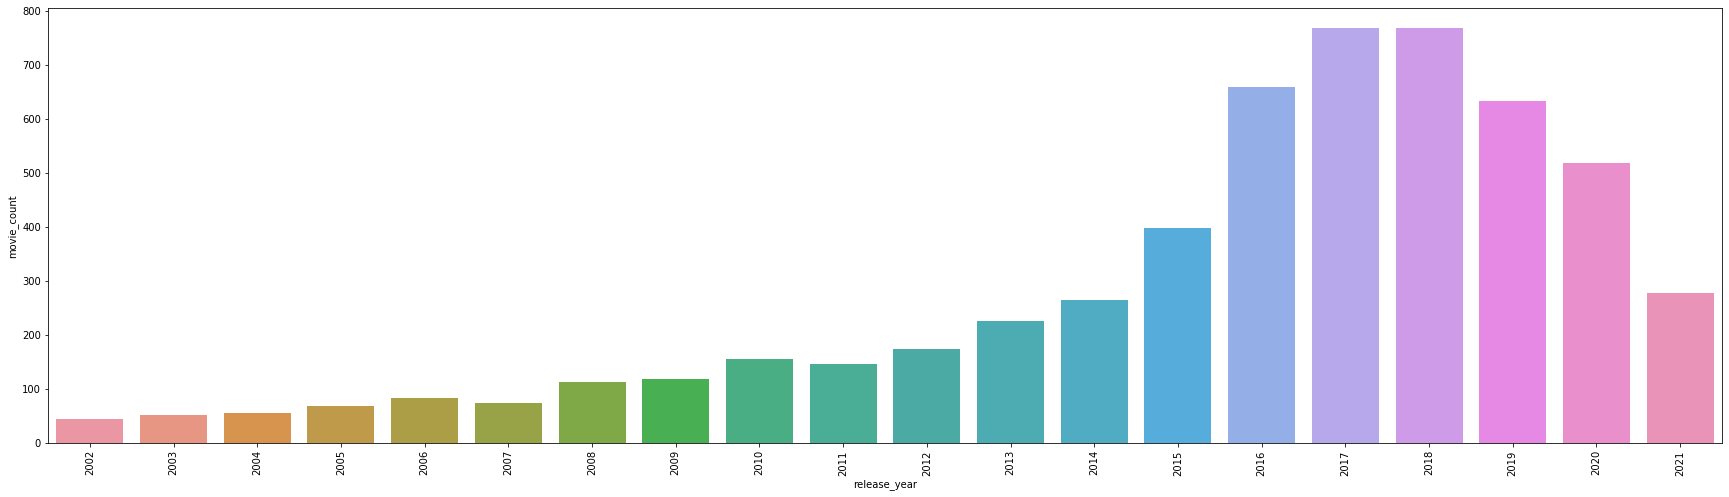

In [ ]:
plt.subplots(figsize=(30, 8))
sns.barplot(movies_count[:20]['release_year'],movies_count[:20]['movie_count'])
plt.xticks(rotation=90)

In [ ]:
def is_classic_modern_new(year):
    if year < pd.to_datetime(1990, format = "%Y"):
        return "classic"
    elif year >= pd.to_datetime(2019, format = "%Y"):
        return "new"
    else:
        return "modern"


In [ ]:
movies["release_year"] = pd.to_datetime(movies["release_year"], format="%Y")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
movies["classic_modern_new"] = movies["release_year"].apply(is_classic_modern_new)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,classic_modern_new
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",new
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021-01-01,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,new
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993-01-01,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",modern
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021-01-01,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,new
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021-01-01,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,new


In [ ]:
movies.groupby('classic_modern_new')['show_id'].count()

classic_modern_new
classic     235
modern     4469
new        1427
Name: show_id, dtype: int64

In [ ]:
for year in movies["release_year"]:
    print(is_classic_modern_new(year))

new
new
modern
new
new
new
new
new
modern
new
modern
modern
modern
modern
modern
new
new
new
modern
classic
classic
classic
classic
new
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
new
new
new
modern
new
new
new
new
new
new
new
new
new
new
new
new
modern
modern
new
new
modern
modern
new
new
modern
modern
modern
new
modern
new
modern
new
modern
modern
modern
new
classic
modern
modern
modern
modern
modern
modern
classic
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
classic
modern
modern
modern
modern
modern
modern
modern
modern
classic
modern
modern
modern
modern
modern
modern
modern
modern
classic
classic
classic
modern
modern
modern
modern
modern
new
modern
new
modern
modern
modern
new
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
new
modern
modern
modern
new
new
modern
new
new
new
new
new
new
new
new
new
new
modern
new
new
new
new
modern
new
modern
new
new
m

new
new
new
new
modern
new
new
new
new
modern
modern
new
new
new
new
new
modern
modern
new
new
modern
new
new
new
new
modern
new
new
classic
classic
classic
classic
classic
new
new
new
classic
modern
classic
classic
modern
modern
new
modern
modern
new
modern
new
new
new
new
new
new
new
modern
modern
modern
modern
modern
modern
new
new
modern
new
modern
modern
new
new
new
modern
modern
modern
modern
modern
new
modern
modern
modern
modern
modern
modern
modern
new
modern
modern
new
new
modern
new
modern
modern
modern
new
modern
new
modern
modern
modern
new
new
new
new
new
new
new
new
modern
new
modern
classic
modern
classic
new
classic
classic
classic
classic
classic
classic
modern
new
modern
modern
new
new
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
new
new
modern
new
modern
new
modern
new
modern
modern
modern
modern
modern
new
new
new
modern
modern
new
new
new
modern
new
modern
new
new
new
new
new
new
new
new
new
modern
new
new
new
modern
new
new
modern
modern


modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
classic
classic
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
mode

modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
classic
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
new
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
classic
modern
modern
modern
classic
modern
modern
modern
modern
modern
new
new
modern
modern
modern
modern
modern
modern
new
modern
modern
modern
modern
modern
modern
new
modern
modern
modern
new
modern
modern
modern
modern
classic
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
new
classic
modern
modern
modern
classic
modern
modern
modern
modern
modern
new
modern
classic
modern
classic
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
new
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
new
modern
modern
modern
modern
modern
modern
modern
modern
modern


modern
modern
modern
classic
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
new
modern
modern
modern
modern
modern
modern
modern
modern
new
classic
modern
modern
modern
modern
modern
modern
classic
modern
modern
modern
modern
modern
modern
modern
modern
modern
classic
modern
modern
modern
modern
modern
modern
modern
classic
classic
classic
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
new
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
modern
new
modern
mode

In [ ]:
movies

In [ ]:
movies.groupby("classic_modern_new")["show_id"].count().sort_values(ascending = False)

### Q: How many new movies on Netflix are rated G?

In [ ]:
len(movies.loc[(movies["rating"] == "G") & (movies["classic_modern_new"] == "new"), :])

2

### Q:What were the dramas that were added to netflix before 2017?

In [ ]:
dramas.loc[dramas["date_added"] < pd.to_datetime('2017-01-01'), ["type", "title", "date_added"]]

,type,title,date_added
5652,Movie,Mr. Pig,2016-12-31
5656,Movie,7:19,2016-12-23
5658,TV Show,Sense8,2016-12-23
5661,Movie,Barry,2016-12-16
5663,Movie,Sister Cities,2016-12-16
...,...,...,...
8710,TV Show,Weeds,2014-04-01
8748,Movie,Winter of Our Dreams,2016-11-01
8788,Movie,You Carry Me,2016-07-01
8800,TV Show,Zindagi Gulzar Hai,2016-12-15
